# BottleNeck EDA (Exploratory Data Analysis)

Se presenta problematica de atochamientos en distintas zonas operacionales en la Geocerca de Coya Sur (CS), es por ello que es necesario realizar una análisis exploratorio para poder determinar algunos conceptos escenciales al momento de entender donde se producen los cuellos de botella. Para ello intentaremos encontrar:
* Eficiencia máxima que presenta una zona operacional, [camiones/hr]
* Zonas horarias donde existe mayor congestión.
* Buscar posibles anomalias en los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el archivo proporcionado por el codigo analyze.py, el cual nos entrega la versión unpivot del dataset original de 1 año de procesos en la geocerca CS, es importante mencionar que del data set original filtramos por los siguientes parámetros:
* Consideramos las 98 operaciones que existian en el dataset
* Consideramos solamente los viajes desde CS a cualquier otro destino
* Agrupamos todas las Z.O en una sola columna compactando de gran forma el DS original.

In [19]:
#Carga de archivo
data= pd.read_csv("df_unpivoted_CS_all_v2.csv")
data.head()

Unnamed: 0  Cycle Id  Year [In]  Month [In]  Day [In]  Hour [In]    Origin  \
0        4226  10019763       2019          10         4          7  Coya Sur   
1        4226  10019763       2019          10         4          7  Coya Sur   
2        4226  10019763       2019          10         4          7  Coya Sur   
3        4226  10019763       2019          10         4          7  Coya Sur   
4        4226  10019763       2019          10         4          7  Coya Sur   

  Destination      Zone Name  Zone Pre Time         Zone Start  \
0    Coya Sur            NaN            NaN                NaN   
1    Coya Sur            NaN            NaN                NaN   
2    Coya Sur            NaN            NaN                NaN   
3    Coya Sur  Losa Envasado         3256.0  20191004 16:14:50   
4    Coya Sur            NaN            NaN                NaN   

            Zone End  Zone Time  
0                NaN        NaN  
1                NaN        NaN  
2                NaN        NaN  
3  20191004 17:15:01     3611.0  
4                NaN        NaN

In [20]:
#Visualizamos las dimensiones
data.shape

(2583574, 13)

In [21]:
#Creamos una columna que contenga las z.o presentes en el dataset
zo=data["Zone Name"].dropna(axis=0).unique().tolist()
print(len(zo))  #Vemos la cantidad
zo              #Visualizamos

19


['Losa Envasado',
 'Galpones',
 'C Secado L-3',
 'Salida',
 'C NPT3',
 'C ATM',
 'C NPT 1-2',
 'Romana Salitre',
 'C Secado L-4',
 'Romana 3',
 'C Prilado',
 'C Granulacion',
 'C CS-4',
 'Romana Mto',
 'C NPT4',
 'C CS-P.Valdivia',
 'C CS-11',
 'C PTS',
 'C CS-12']

Ahora que hemos revisado el Data Ser falta agrupar las columnas por Zona, Hora y Día, de esta forma estaremos incluyendo los camiones que pasan por día en un determinado lugar y a una determinada hora.

In [49]:
#Agrupamos por Z.O, hr y día
df=data.groupby(['Zone Name', 'Hour [In]','Day [In]']).agg(
    tiempo_promedio=pd.NamedAgg(column='Zone Time', aggfunc=np.mean),
    camiones=pd.NamedAgg(column='Zone Time', aggfunc='count'),
    time_min=pd.NamedAgg(column='Zone Time', aggfunc='min'),
    total_time=pd.NamedAgg(column='Zone Time', aggfunc='sum'),
    hora=pd.NamedAgg(column='Hour [In]', aggfunc='first')
    #zone=pd.NamedAgg(column='Zone Name', aggfunc='first')
)


In [94]:
#Analicemos como se vé para una z.o en particular
df

tiempo_promedio  camiones  time_min  total_time  \
Zone Name Hour [In] Day [In]                                                    
C ATM     0         25             120.000000         1     120.0       120.0   
          1         27            1575.000000         1    1575.0      1575.0   
                    30            2132.500000         2    1915.0      4265.0   
          2         7             4987.000000         1    4987.0      4987.0   
                    22             420.000000         1     420.0       420.0   
...                                       ...       ...       ...         ...   
Salida    23        27            2338.727273        22     240.0     51452.0   
                    28            3462.363636        22     239.0     76172.0   
                    29            3214.653846        26     178.0     83581.0   
                    30             890.400000        15     299.0     13356.0   
                    31            3162.000000        12     240.0     37944.0   

                              hora  
Zone Name Hour [In] Day [In]        
C ATM     0         25           0  
          1         27           1  
                    30           1  
          2         7            2  
                    22           2  
...                            ...  
Salida    23        27          23  
                    28          23  
                    29          23  
                    30          23  
                    31          23  

[7988 rows x 5 columns]

**Con ello ahora podemos visualizar la cantidad de camiones en función del horario** 

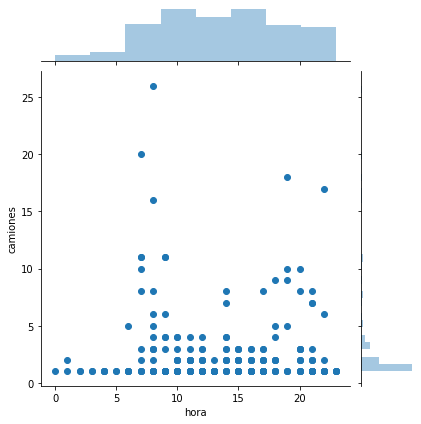

In [51]:
sns.jointplot(x='hora', y="camiones", data=df.loc["C ATM"],kind="scatter")

**Y del mismo modo podemos analizar el tiempo promedio que demora en pasar un camion en cada horario**

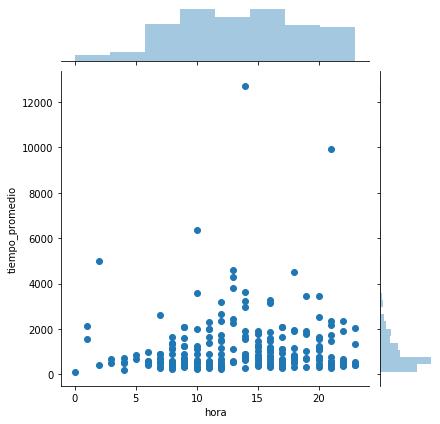

In [52]:
#Visualización Hora vs Tiempo_prom 
sns.jointplot(x="hora", y='tiempo_promedio', data=df.loc["C ATM"])

**Podemos observar si existe una correlación entre tiempos minimos, tiempo promedio y horarios**

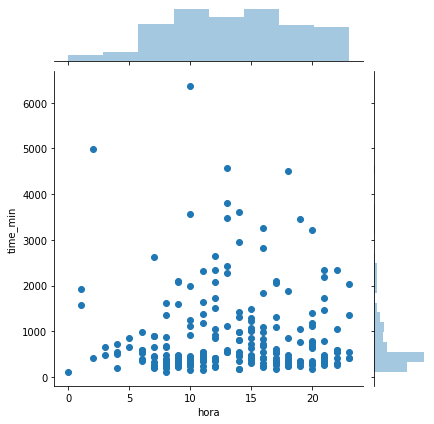

In [53]:
sns.jointplot(x="hora", y='time_min', data=df.loc["C ATM"])

**Quizas un boxplot nos represente mejor el panorama**

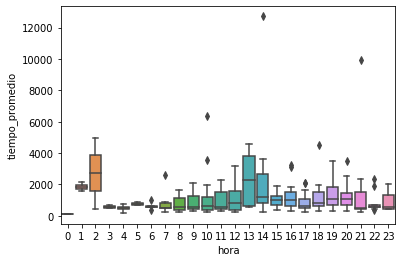

In [59]:
#Hora vs tiempo promedio de 1 vehiculo
sns.boxplot(x="hora", y='tiempo_promedio', data=df.loc["C ATM"])

# Visualización para todas las columnas

**Podriamos observar en un mapa de calor como es el comportamiento del tiempo, es decir cuando más se utilizó cada zona.**

In [82]:
#Vemos como era el ds original
data.head(10)

Unnamed: 0  Cycle Id  Year [In]  Month [In]  Day [In]  Hour [In]    Origin  \
0        4226  10019763       2019          10         4          7  Coya Sur   
1        4226  10019763       2019          10         4          7  Coya Sur   
2        4226  10019763       2019          10         4          7  Coya Sur   
3        4226  10019763       2019          10         4          7  Coya Sur   
4        4226  10019763       2019          10         4          7  Coya Sur   
5        4226  10019763       2019          10         4          7  Coya Sur   
6        4226  10019763       2019          10         4          7  Coya Sur   
7        4226  10019763       2019          10         4          7  Coya Sur   
8        4226  10019763       2019          10         4          7  Coya Sur   
9        4226  10019763       2019          10         4          7  Coya Sur   

  Destination      Zone Name  Zone Pre Time         Zone Start  \
0    Coya Sur            NaN            NaN                NaN   
1    Coya Sur            NaN            NaN                NaN   
2    Coya Sur            NaN            NaN                NaN   
3    Coya Sur  Losa Envasado         3256.0  20191004 16:14:50   
4    Coya Sur            NaN            NaN                NaN   
5    Coya Sur            NaN            NaN                NaN   
6    Coya Sur            NaN            NaN                NaN   
7    Coya Sur            NaN            NaN                NaN   
8    Coya Sur            NaN            NaN                NaN   
9    Coya Sur            NaN            NaN                NaN   

            Zone End  Zone Time  
0                NaN        NaN  
1                NaN        NaN  
2                NaN        NaN  
3  20191004 17:15:01     3611.0  
4                NaN        NaN  
5                NaN        NaN  
6                NaN        NaN  
7                NaN        NaN  
8                NaN        NaN  
9                NaN        NaN

In [69]:
#Pivoteamos utilizando las columnas que queremos estudiar
heat_map=data.pivot_table(index="Hour [In]",columns="Zone Name",values="Zone Time")
heat_map

Zone Name        C ATM      C CS-11  C CS-12      C CS-4  C CS-P.Valdivia  \
Hour [In]                                                                   
0           120.000000          NaN   171.00  658.742424              NaN   
1          1946.666667          NaN      NaN  450.326923              NaN   
2          2703.500000          NaN      NaN  545.780702       150.000000   
3           570.000000          NaN      NaN  560.778761              NaN   
4           490.000000          NaN      NaN  486.176471              NaN   
5           755.500000   121.000000      NaN  428.853448              NaN   
6           586.000000          NaN      NaN  454.229167       140.000000   
7           533.347826   567.558140   599.00  871.549645       387.384615   
8           521.292683   642.821429  1107.75  690.925373      2298.000000   
9           812.160000   505.400000   175.00  567.946565       183.000000   
10          899.538462   333.000000   121.00  567.565217       179.000000   
11         1003.153846   449.500000   251.00  466.291866       546.000000   
12         1140.259259  1288.000000      NaN  531.755396       597.000000   
13         2445.600000   270.000000   687.00  471.011429      2151.000000   
14         2320.634146   339.923077   139.50  557.702564       515.400000   
15         1062.461538   180.000000   161.00  530.409091       680.000000   
16         1328.041667   120.000000   159.25  526.102941              NaN   
17          818.833333          NaN      NaN  566.199203      1153.000000   
18         1009.300000          NaN  1406.00  707.748927      2697.333333   
19         1101.577778   460.750000   328.00  784.707047       448.916667   
20         1071.024390   400.000000   814.00  736.489270       631.900000   
21         2518.150000          NaN   361.00  823.100295      9203.500000   
22          715.741935          NaN   132.00  703.304878       893.333333   
23          953.400000          NaN      NaN  606.336000              NaN   

Zone Name  C Granulacion   C NPT 1-2      C NPT3      C NPT4       C PTS  \
Hour [In]                                                                  
0            7539.937500  443.666667  383.112805  361.187500  370.470588   
1           17297.000000  345.000000  383.282895  420.426471  328.500000   
2                    NaN  467.666667  365.740741  371.277778  343.400000   
3             405.000000  398.944444  411.022624  335.789474  378.210526   
4                    NaN  391.857143  381.654676  381.533333  428.500000   
5                    NaN  379.571429  408.089928  478.692308  379.812500   
6            3251.363636  519.363636  405.861357  390.623377  415.333333   
7            1465.500000  497.666667  421.486938  428.270408  387.881356   
8            2179.809524  482.410959  427.148515  421.192469  360.755102   
9            2383.166667  577.933333  443.736648  461.978723  342.809524   
10           1275.000000  443.842105  440.474531  430.803030  346.600000   
11           2332.000000  538.296296  431.320423  388.535912  369.393939   
12            360.000000  511.833333  420.078632  435.929032  385.857143   
13                   NaN  367.750000  426.337278  485.577586  437.285714   
14            762.571429  464.111111  428.603113  511.609023  402.222222   
15           5372.625000  657.523810  404.817248  460.404762  371.488889   
16          10327.307692  404.538462  402.064885  441.275641  356.656250   
17          14466.666667  383.972222  420.746711  407.651316  496.705882   
18           4854.538462  435.897959  437.272374  527.793269  402.120690   
19           4783.333333  507.136364  475.840261  508.493927  380.551724   
20          11537.000000  463.763158  446.245313  595.930348  455.131579   
21          18205.500000  509.388889  460.107527  510.036269  431.921053   
22          13581.500000  402.937500  434.794979  441.465116  471.785714   
23          22710.500000  463.000000  383.916399  347.287234  381.714286   

Zone Name    C Prila

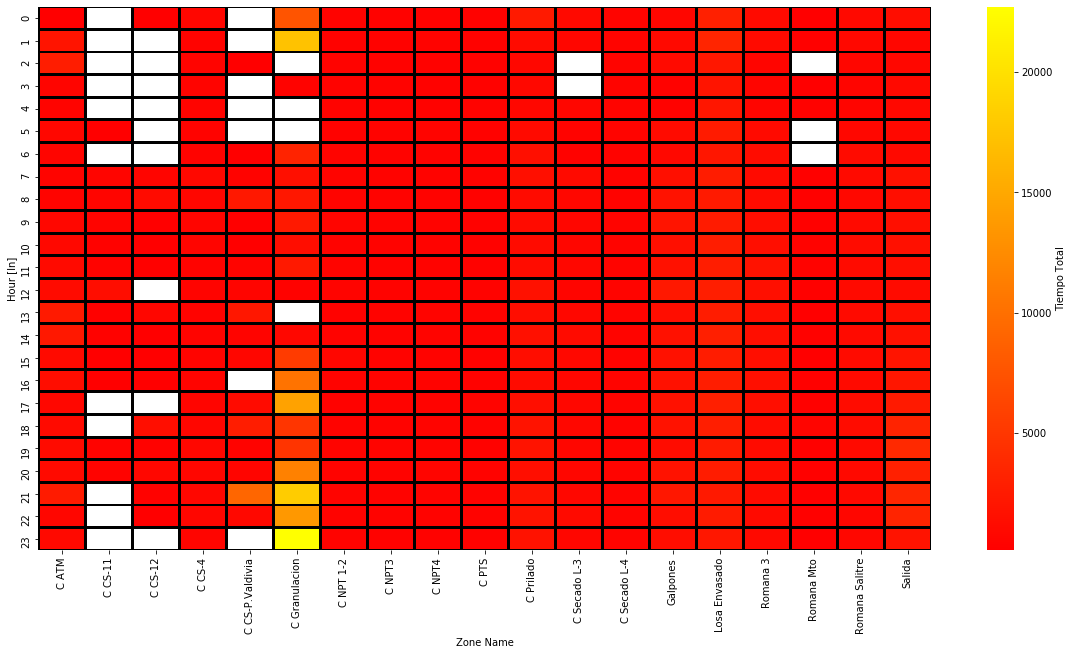

In [87]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(heat_map,cmap="autumn",linecolor="black", linewidths=2,cbar_kws={'label': 'Tiempo Total'})

En este último mapa podemos deducir lo siguiente:
* La Cancha Granulación es donde se presentan mayoritariamente el mayor exceso de tiempo, es decir, hay mucho flujo en ese sector, problamente haya que analizar ese segmento con mayor claridad
* Cancha Valdivia presenta un caso similar a eso de las 21 hrs